# Análise de dados com SQL

### De onde vem o dataset?
O dataset usado é da competição hospedada no Kaggle [Predict Future Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data). Consiste no histórico de vendas de algumas lojas na rússia entre Janeiro de 2013 e Outubro de 2015, provida pela [1C Company](https://1c.ru/eng/title.htm) para uma atividade no curso ["How to win a data science competition"](https://www.coursera.org/learn/competitive-data-science/home/welcome) na Coursera.

### Como está dividido esse documento?
Na primeira parte, o arquivo de banco de dados **SQLite** é criado no arquivo `sales.db`, e as tabelas construídas a partir da modelagem feita na imagem abaixo. A biblioteca Pandas é utilizada para processar os arquivos CSV e dividir os dados entre as colunas do banco.

![img](https://)

Na segunda parte o arquivo é alternativamente lido de um banco já preenchido e em seguida cada query é mostrada em funcionamento, conforme o jupyter notebook na raiz do repositório.

In [16]:
import os
from pathlib import Path
import sqlite3
import pandas as pd

CSV_FOLDER = 'kaggle_download/'
QUERIES_FOLDER = 'queries/'

def criar_banco(filename='sales.db'):
    try:
        os.remove(filename)
    except Exception:
        pass

    Path('sales.db').touch()

def criar_tabelas(filename='sales.db'):
    conn = sqlite3.connect(filename)
    c = conn.cursor()


    c.execute('''
    CREATE TABLE item_categories (
        item_category_name VARCHAR(20),
        item_category_id INT(5),
        PRIMARY KEY (item_category_id)
    );
    ''')
    
    c.execute('''
    CREATE TABLE items (
        item_name VARCHAR(40) DEFAULT '',
        item_id INT(5),
        item_category_id INT(5),
        PRIMARY KEY (item_id)
    );
    ''')
    
    c.execute('''
    CREATE TABLE shops (
        shop_name VARCHAR(40) DEFAULT '',
        shop_id INT(5),
        PRIMARY KEY (shop_id)
    );
    ''')
    
    
    c.execute('''
    CREATE TABLE sales (
        sale_id INT(5) NOT NULL,
        item_id INT(5),
        date DATE(10),
        item_price DOUBLE(20),
        item_cnt_day INT(5),
        shop_id INT(5),
        PRIMARY KEY (sale_id)
    );
    ''')


    shops = pd.read_csv(CSV_FOLDER + 'shops.csv')
    shops.to_sql('shops', conn, if_exists='append', index = False)
    
    items = pd.read_csv(CSV_FOLDER + 'items.csv')
    items.to_sql('items', conn, if_exists='append', index = False)
    
    sales = pd.read_csv(CSV_FOLDER + 'sales_train.csv')
    sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y') # A data vem no formato russo, é necessário converter para ISO
    sales = sales.drop('date_block_num', 1) # Date block num é uma coluna redundante com a mesma informação que tem em `date`
    sales = sales.rename_axis('sale_id').reset_index() # SQLite3 não suporta autoincrement, então criamos uma coluna de id manualmente
    
    sales.to_sql('sales', conn, if_exists='append', index = False)
    
    item_categories = pd.read_csv(CSV_FOLDER + 'item_categories.csv')
    item_categories.to_sql('item_categories', conn, if_exists='append', index = False)
    conn.close()



In [17]:
arquivo_banco = 'sales.db'
criar_banco(arquivo_banco)
criar_tabelas(arquivo_banco)

conn = sqlite3.connect(arquivo_banco)
c = conn.cursor()

In [18]:
def ler_arquivo(arquivo):
    with open(arquivo, "r") as db:
        lines = list(db.readlines())

        return "\n".join(lines)

## Query 1 - Lista de jogos de PC mais vendidos em todas as lojas

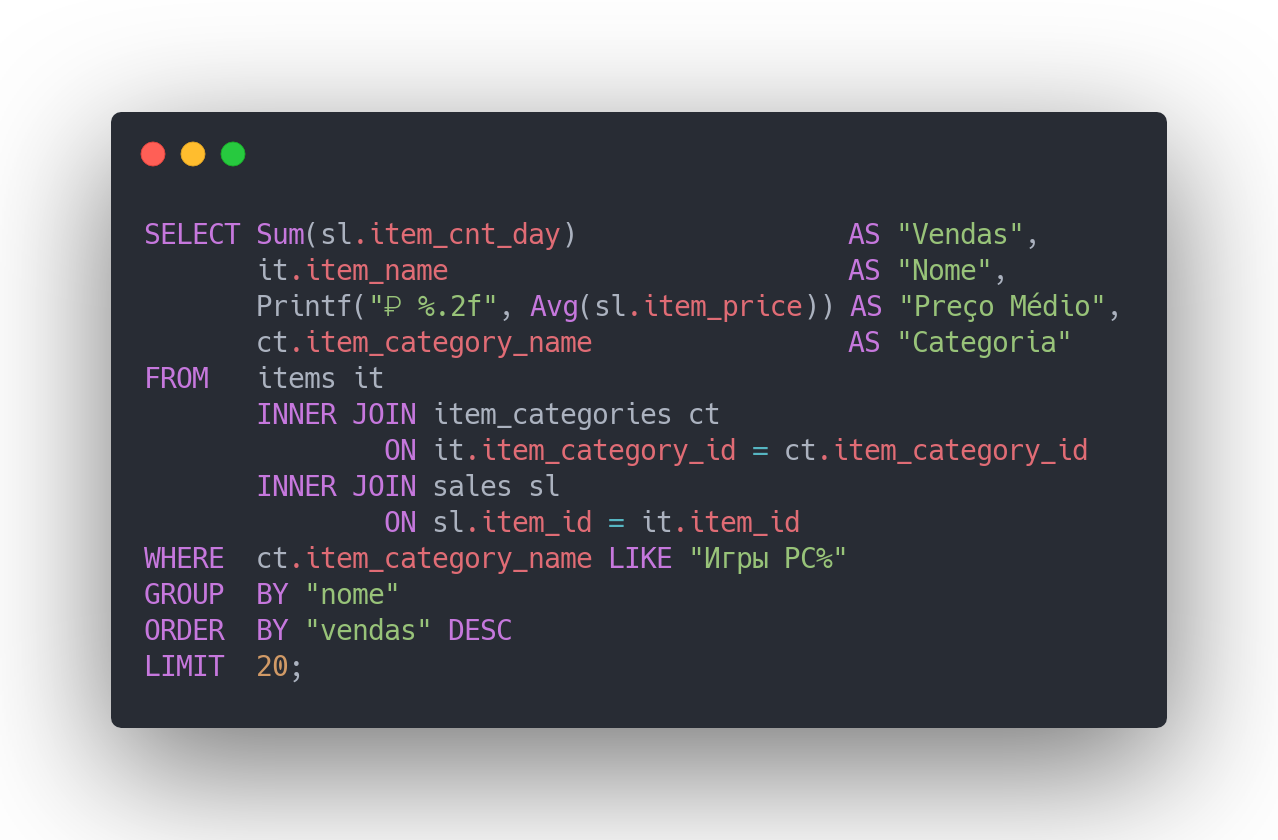

In [19]:
query1 = ler_arquivo(QUERIES_FOLDER + "query1.sql")
pd.read_sql(query1, conn)

,Vendas,Nome,Preço Médio,Categoria
0,17245,"Diablo III [PC, Jewel, русская версия]",₽ 999.58,Игры PC - Стандартные издания
1,10099,"Grand Theft Auto V [PC, русские субтитры]",₽ 2051.76,Игры PC - Стандартные издания
2,10032,"Battlefield 4 [PC, русская версия]",₽ 922.22,Игры PC - Стандартные издания
3,9012,World of Warcraft. Карта оплаты игрового време...,₽ 808.54,Игры PC - Дополнительные издания
4,8262,"FIFA 14 [PC, русская версия]",₽ 1018.78,Игры PC - Стандартные издания
5,7788,"Crysis 3 [PC, русская версия]",₽ 636.41,Игры PC - Стандартные издания
6,7588,"Call of Duty: Black Ops II [PС, Jewel, русская...",₽ 420.24,Игры PC - Стандартные издания
7,7351,StarCraft II: Heart of the Swarm (дополнение) ...,₽ 644.06,Игры PC - Стандартные издания
8,7105,"Diablo III: Reaper of Souls (дополнение) [PC, ...",₽ 888.23,Игры PC - Дополнительные издания
9,6975,"Battlefield 3 [PC, Jewel, русская версия]",₽ 528.72,Игры PC - Стандартные издания


## Query 2 - Lista de lojas com mais de 5000 produtos anunciados e seu item mais vendido

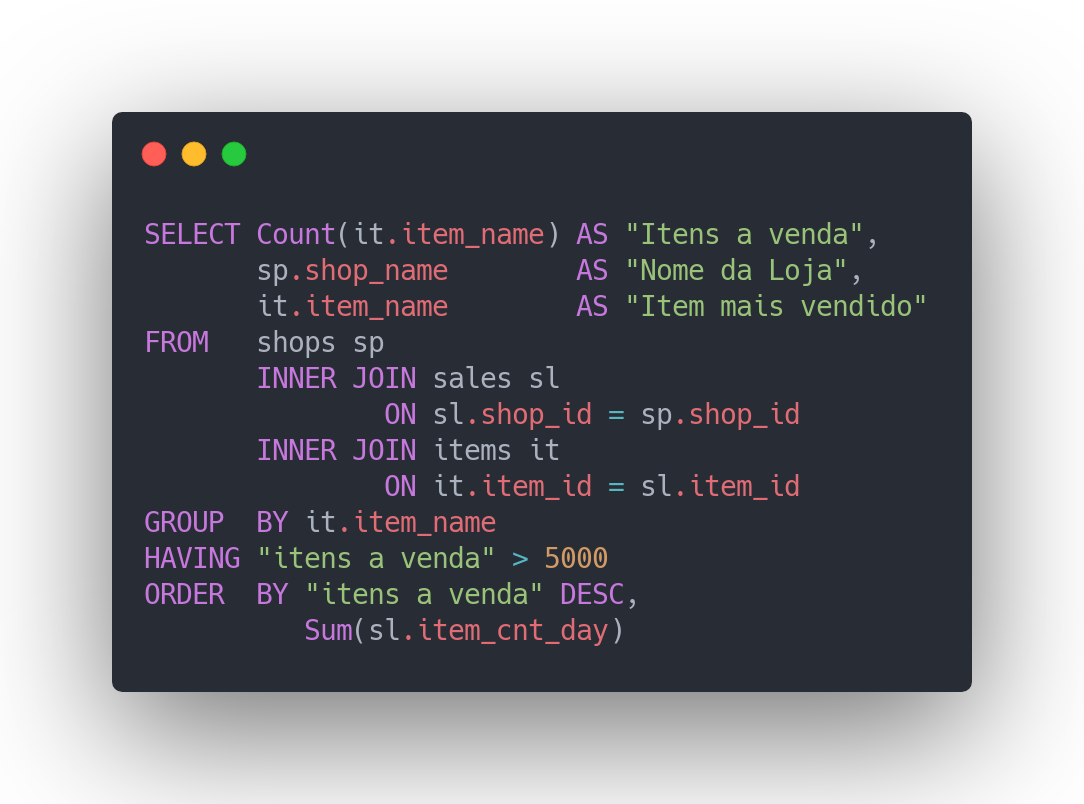

In [20]:
query2 = ler_arquivo(QUERIES_FOLDER + "query2.sql")
pd.read_sql(query2, conn)

,Itens a venda,Nome da Loja,Item mais vendido
0,31340,Москва Магазин С21,Фирменный пакет майка 1С Интерес белый (34*42)...
1,9408,"Москва ТРК ""Атриум""",Playstation Store пополнение бумажника: Карта ...
2,9067,Москва Магазин С21,Прием денежных средств для 1С-Онлайн
3,7479,"Москва ТРК ""Атриум""","Diablo III [PC, Jewel, русская версия]"
4,6853,"Москва ТРК ""Атриум""",Kaspersky Internet Security Multi-Device Russi...
5,6602,"Москва ТРК ""Атриум""",World of Warcraft. Карта оплаты игрового време...
6,6475,"Москва ТРК ""Атриум""","Grand Theft Auto V [PS3, русские субтитры]"
7,6320,"Москва ТРК ""Атриум""","Call of Duty: Black Ops II [PС, Jewel, русская..."
8,5811,"Москва ТРК ""Атриум""","Minecraft [Xbox 360, английская версия]"
9,5805,"Москва ТРК ""Атриум""","Grand Theft Auto V [Xbox 360, русские субтитры]"


## Query 3 - Número de vendas e preço por mês do jogo "Dishonred Game of the Year Edition" para XBOX 360 durante o ano de 2014


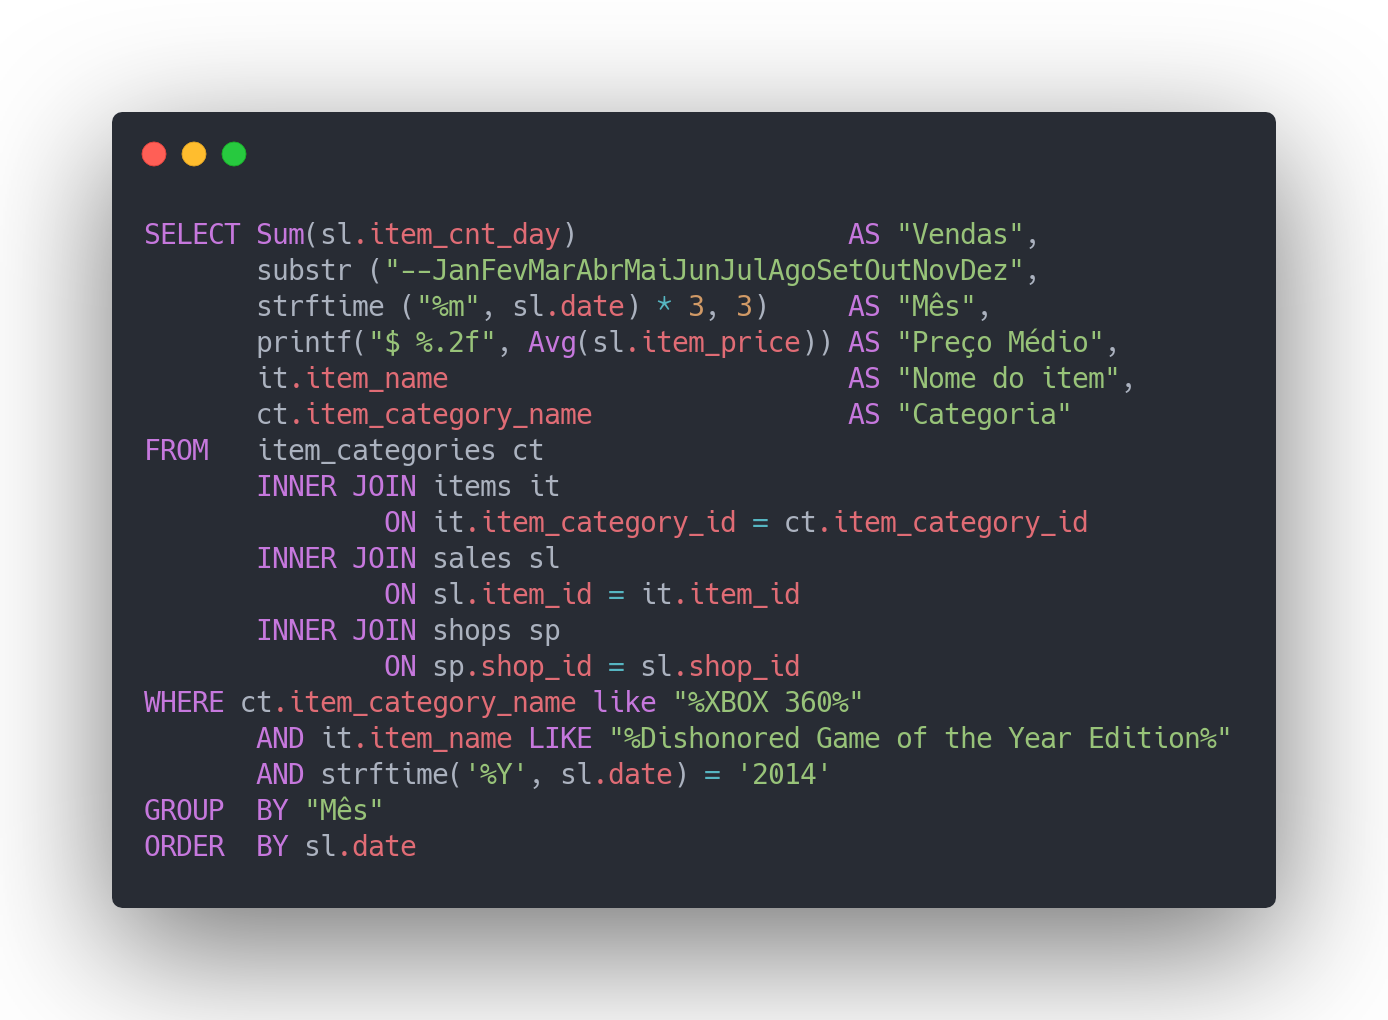

In [22]:
query3 = ler_arquivo(QUERIES_FOLDER + "query3.sql")
result_3 = pd.read_sql(query3, conn)
result_3.style.set_properties(subset=['Preço Médio'], **{'width-max': '70px'})
result_3

,Vendas,Mês,Preço Médio,Nome do item,Categoria
0,18,Jan,$ 1776.78,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
1,26,Fev,$ 1321.33,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
2,27,Mar,$ 1259.01,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
3,20,Abr,$ 1286.01,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
4,13,Mai,$ 1573.95,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
5,10,Jul,$ 1259.06,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
6,12,Ago,$ 1336.19,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
7,1,Set,$ 1259.00,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
8,3,Out,$ 1259.20,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
9,2,Nov,$ 1259.00,"Dishonored Game of the Year Edition [Xbox 360,...",Игры - XBOX 360
